### Importação das Bibliotecas:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Leitura dos dados, transformações e cálculo das médias móveis exponenciais:

In [5]:
#Leitura do arquivo
df = pd.read_excel('BTC_USDT.xlsx')

In [6]:
#Verifica os tipos de dados e a presença ou não de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Open Time             4320 non-null   datetime64[ns]
 1   Open                  4320 non-null   float64       
 2   High                  4320 non-null   float64       
 3   Low                   4320 non-null   float64       
 4   Close                 4320 non-null   float64       
 5   Volume                4320 non-null   float64       
 6   sumOpenInterest       4320 non-null   float64       
 7   sumOpenInterestValue  4320 non-null   float64       
 8   Long/Short Ratio      4321 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 303.9 KB


In [7]:
#Verifica os dados estatísticos, tais como média, mediana e percentil de todas as features
df.describe()

,Open Time,Open,High,Low,Close,Volume,sumOpenInterest,sumOpenInterestValue,Long/Short Ratio
count,4320,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4.320000e+03,4321.000000
mean,2024-06-18 12:02:30,65290.137986,65339.322037,65236.633634,65288.313542,760.134192,79338.165151,5.183494e+09,2.353512
min,2024-06-11 00:05:00,58904.400000,59178.000000,58218.000000,58904.400000,23.989000,73832.209000,4.553931e+09,1.364600
25%,2024-06-14 18:03:45,64282.075000,64295.950000,64263.025000,64281.975000,206.625500,77549.204500,4.961282e+09,2.140700
50%,2024-06-18 12:02:30,65474.450000,65525.850000,65422.750000,65473.900000,404.061500,79534.043500,5.187187e+09,2.310200
75%,2024-06-22 06:01:15,66647.375000,66694.400000,66596.025000,66646.275000,835.292750,81172.099500,5.409200e+09,2.549900
max,2024-06-26 00:00:00,69973.600000,70028.000000,69864.500000,69973.600000,28226.594000,85856.929000,5.965248e+09,3.380200
std,NaN,2017.304520,2014.653966,2019.210990,2016.971456,1240.782945,2609.657527,3.004512e+08,0.358420


In [8]:
#Verifica as 5 primeiras linhas do dataframe
df.head()

,Open Time,Open,High,Low,Close,Volume,sumOpenInterest,sumOpenInterestValue,Long/Short Ratio
0,2024-06-11 00:05:00,69599.4,69599.4,69519.5,69554.4,270.477,85538.914,5.953457e+09,1.4067
1,2024-06-11 00:10:00,69554.5,69600.0,69554.5,69561.7,106.359,85615.719,5.954959e+09,1.4073
2,2024-06-11 00:15:00,69561.6,69597.6,69554.0,69591.8,100.241,85586.589,5.953545e+09,1.4120
3,2024-06-11 00:20:00,69591.8,69597.7,69557.8,69575.7,97.986,85577.169,5.955461e+09,1.4149
4,2024-06-11 00:25:00,69575.8,69594.2,69520.0,69520.1,144.910,85571.311,5.953658e+09,1.4166


In [9]:
#Cálculo das Médias Móveis Exponenciais (EMAs) de 7, 21 e 100 últimos períodos
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()

### Análise da correlação entre o Long/Short Ratio e o Preço de Fechamento do Ativo:

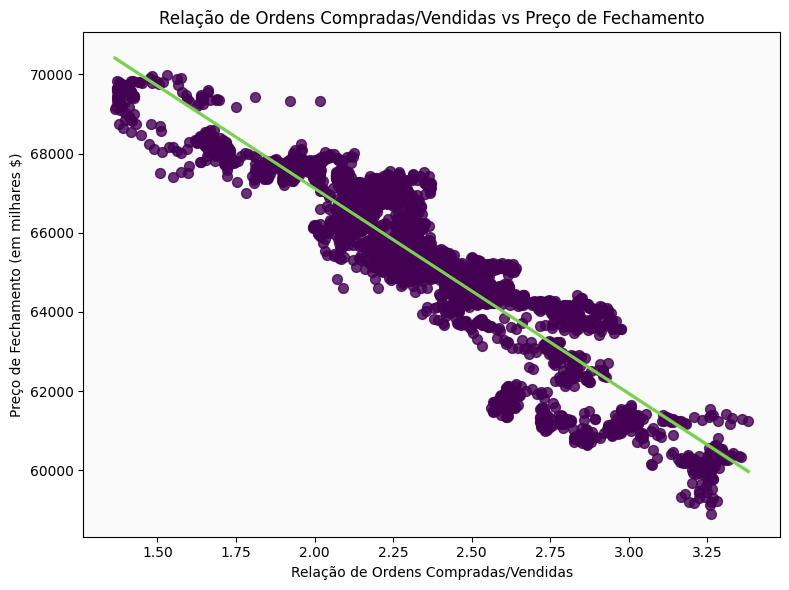

In [10]:
#Define o tamanho da figura
plt.figure(figsize=(8, 6))

#Altera a cor de fundo do gráfico e remove as linhas de grade
plt.rc("axes",facecolor="#fafafa",grid=False)

#Plota os dados de Long/Short Ratio no eixo X e de Fechamento de preço no eixo Y
sns.regplot(x='Long/Short Ratio', y='Close', data=df, scatter_kws={'s': 50}, color = '#440154', line_kws={'color': '#7ad151'})

#Acrescenta o título do gráfico
plt.title('Relação de Ordens Compradas/Vendidas vs Preço de Fechamento')

#Define os rótulos dos eixos
plt.xlabel('Relação de Ordens Compradas/Vendidas')
plt.ylabel('Preço de Fechamento (em milhares $)')

#Ajusta as margens do gráfico
plt.tight_layout()

#Salva em formato vetorial
plt.savefig("correlacao_lsr.svg")

#Exibe o gráfico
plt.show()

In [11]:
#Cálculo da correlação
correlation = df['Long/Short Ratio'].corr(df['Close'])
print(f"Coeficiente de correlação: {correlation}")

Coeficiente de correlação: -0.9202778983610352


### Análise da correlação entre o Open Interest e o Preço de Fechamento do Ativo:

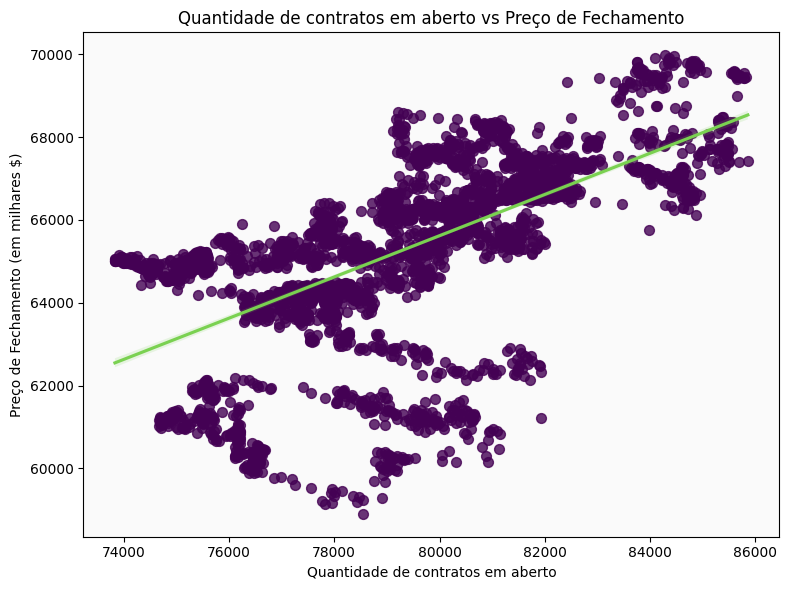

In [12]:
#Define o tamanho da figura
plt.figure(figsize=(8, 6))

#Altera a cor de fundo do gráfico e remove as linhas de grade
plt.rc("axes",facecolor="#fafafa",grid=False)

#Plota os dados de Open Interest no eixo X e de Fechamento de preço no eixo Y
sns.regplot(x='sumOpenInterest', y='Close', data=df, scatter_kws={'s': 50}, color = '#440154', line_kws={'color': '#7ad151'})

#Acrescenta o título do gráfico
plt.title('Quantidade de contratos em aberto vs Preço de Fechamento')

#Define os rótulos dos eixos
plt.xlabel('Quantidade de contratos em aberto')
plt.ylabel('Preço de Fechamento (em milhares $)')

#Remove as linhas de grade do gráfico
plt.grid(False)

#Ajusta as margens do gráfico
plt.tight_layout()

#Salva em formato vetorial
plt.savefig("correlacao_oi.svg")

#Exibe o gráfico
plt.show()

In [13]:
#Cálculo da correlação
correlation = df['sumOpenInterest'].corr(df['Close'])
print(f"Coeficiente de correlação: {correlation}")

Coeficiente de correlação: 0.6439449755290904


### Modelo de Árvore de Decisão para previsão da alta ou queda no preço do ativo:

In [15]:
#Criar a coluna 'Target',que define se o preço de fechamento é maior ou menor do que o anterior e portanto, o ativo subiu ou caiu de preço no fechamento
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], "Sobe", "Desce")

#Remove a últinha linha sem target visto que não sabemos o próximo ponto
df = df[:-1]

#Define as Features a serem usadas para prever o target
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_7', 'EMA_21', 'EMA_100', 'sumOpenInterest','Long/Short Ratio']]
y = df['Target']

#Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinar o modelo de Árvore de Decisão, com uso da randomização mais popular = 42)
clf = DecisionTreeClassifier(random_state=42)

#Normaliza os valores
clf.fit(X_train, y_train)

#Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

#Cálculo da acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

#Cálculo da Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia: 54.05%
Matriz de Confusão:
[[255 194]
 [203 212]]


In [23]:
#Exporta a base contendo a informação do target, para melhor visualização
df.to_csv('resultadosdf.csv')

In [16]:
#Cria e exporta as previsões do modelo
results = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
})

results.to_csv('resultados.csv',sep=",")